In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
import numpy as np

In [12]:
df = pd.read_csv('largedata_weather_trips_2022.csv', usecols=['ride_id', 'member_casual', 'DATE', 'TMIN', 'TAVG', 'TMAX'])

In [13]:
df.head()

,ride_id,member_casual,DATE,TMIN,TAVG,TMAX
0,DF208007EE5F9D79,member,2022-08-26,78,81,88
1,48A796B4996BACB0,member,2022-08-03,74,82,92
2,AE459F435C0B1D5B,member,2022-08-11,74,80,91
3,CA8B4A94620E74C0,member,2022-08-10,75,81,86
4,EB85C6F0148BC348,member,2022-08-31,72,78,85


In [14]:
df['DATE']=pd.to_datetime(df['DATE'])

In [15]:
df.dtypes

ride_id                  object
member_casual            object
DATE             datetime64[ns]
TMIN                      int64
TAVG                      int64
TMAX                      int64
dtype: object

In [16]:
# Create a line plot of the temperatures for 2022 plotted as time series using the 
# weather dataframe. For this example, use a pandas plotting function.

In [17]:
# set date as the index
df_temp = df.set_index('DATE')

In [18]:
df_temp.head()

,ride_id,member_casual,TMIN,TAVG,TMAX
DATE,,,,,
2022-08-26,DF208007EE5F9D79,member,78,81,88
2022-08-03,48A796B4996BACB0,member,74,82,92
2022-08-11,AE459F435C0B1D5B,member,74,80,91
2022-08-10,CA8B4A94620E74C0,member,75,81,86
2022-08-31,EB85C6F0148BC348,member,72,78,85


<Axes: xlabel='DATE'>

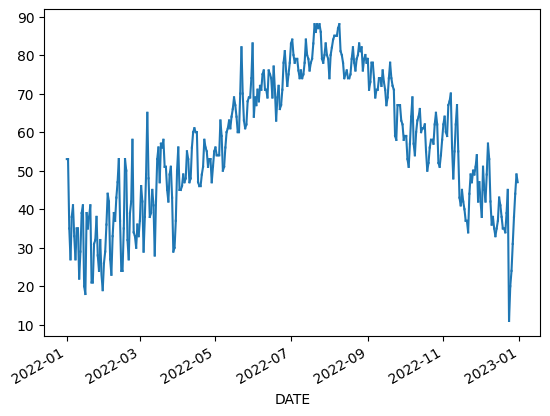

In [19]:
# Increase the path chunksize
plt.rcParams['agg.path.chunksize'] = 10000

# Plot the data
df_temp['TAVG'].plot()

In [24]:
# Create a column with the count of trips per day and merge it with the weather dataframe

In [25]:
df_group = pd.DataFrame (df.groupby (['DATE'])['ride_id'].count()).reset_index()

In [26]:
df_group.rename(columns={'ride_id': 'count_of_rides_daily'}, inplace = True)

In [27]:
df = df.merge(df_group, on = "DATE" , how = 'outer', indicator = True)

In [28]:
print (df['_merge'].value_counts(dropna=False))

_merge
both          30689921
left_only            0
right_only           0
Name: count, dtype: int64


In [29]:
print("Shape of January 1st is", df[df['DATE'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['DATE'] == '2022-01-02'].shape) # Second check 

Shape of January 1st is (20895, 8)
Shape of January 2nd is (44234, 8)


In [30]:
df.head()

,ride_id,member_casual,DATE,TMIN,TAVG,TMAX,count_of_rides_daily,_merge
0,F2147CAB2E003A12,member,2022-01-01,50,53,57,20895,both
1,27FF7FCE0F8A02DF,casual,2022-01-01,50,53,57,20895,both
2,E413BC1D0B4C6031,casual,2022-01-01,50,53,57,20895,both
3,1967ADD90811CE78,member,2022-01-01,50,53,57,20895,both
4,D199C729356BA836,casual,2022-01-01,50,53,57,20895,both


In [31]:
df_temp.head()

,ride_id,member_casual,TMIN,TAVG,TMAX
DATE,,,,,
2022-08-26,DF208007EE5F9D79,member,78,81,88
2022-08-03,48A796B4996BACB0,member,74,82,92
2022-08-11,AE459F435C0B1D5B,member,74,80,91
2022-08-10,CA8B4A94620E74C0,member,75,81,86
2022-08-31,EB85C6F0148BC348,member,72,78,85


In [32]:
# Create a line chart of bike trip counts and temperatures plotted on a dual axis

In [33]:
# Set date as index
df_temp = df.set_index('DATE')

In [34]:
df_temp.head()

,ride_id,member_casual,TMIN,TAVG,TMAX,count_of_rides_daily,_merge
DATE,,,,,,,
2022-01-01,F2147CAB2E003A12,member,50,53,57,20895,both
2022-01-01,27FF7FCE0F8A02DF,casual,50,53,57,20895,both
2022-01-01,E413BC1D0B4C6031,casual,50,53,57,20895,both
2022-01-01,1967ADD90811CE78,member,50,53,57,20895,both
2022-01-01,D199C729356BA836,casual,50,53,57,20895,both


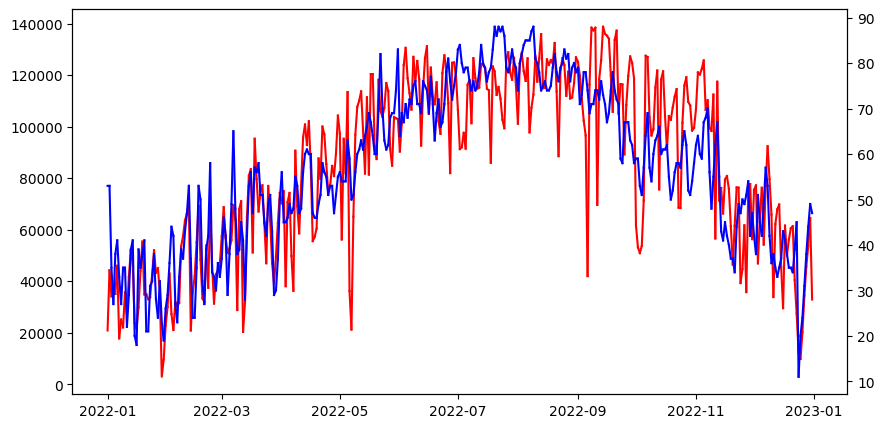

In [52]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['count_of_rides_daily'],color = "red")

# Create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["TAVG"], color = "blue")
plt.show()

##### Paradigm used : Object-Oriented Programming (OOP)
One of matplotlib’s main strengths is plotting multiple visualizations in the same plot.
fig and ax are objects created by plt.subplots(). fig represents the entire figure, 
and ax represents a single subplot within that figure.
ax2 is another object created by ax.twinx(). This method returns a new 
Axes object (ax2) that shares the same x-axis but has a separate y-axis. 
This also solves the issue of have two variables with different scales as they are plotted
on their own y-axes. 